# Lista 7

### Zaimplementowane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
def draw(results, colors='red'):
    ys = [i for i in range(0, len(results)-1)]
    for i in range(0, len(results)-1):
        x = np.linspace(results[i], results[i+1], 10)
        y = np.linspace(ys[i], ys[i], 10)
        plt.plot(x, y, c=colors)
        plt.vlines(x=results[i+1], ymin=ys[i], ymax=ys[i]+1,colors=colors, linestyles='dotted', linewidth=1)
        plt.hlines(ys[-1]+1, xmin=results[-1], xmax=results[-1] + 0.1, colors=colors)


def func(t, lam=2):
    return lam*t 


### Zadanie 1

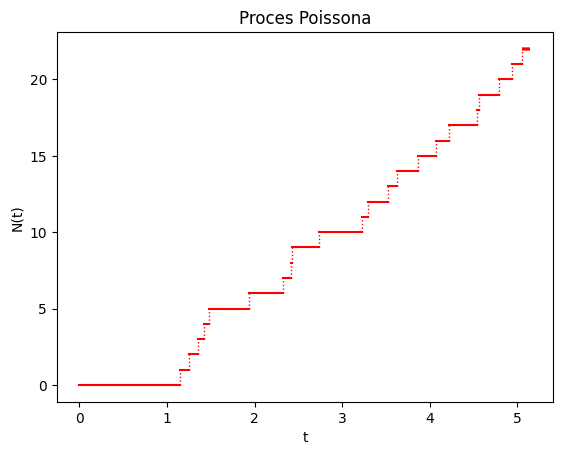

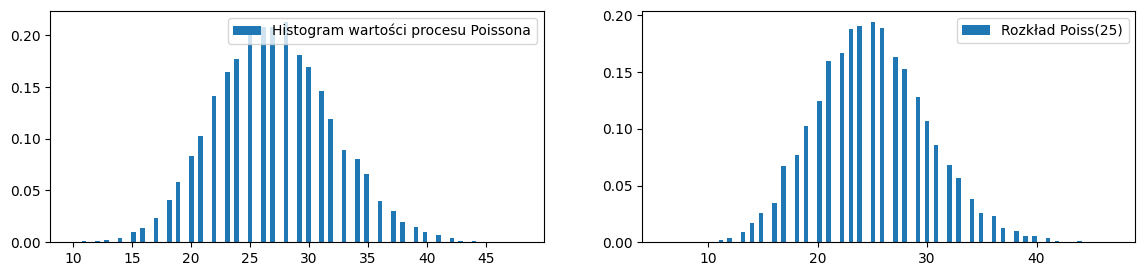

In [3]:
def nhpp(lam = 2, T = 5):
    times = np.array([0])
    t = 0
    lam_max = func(T)
    while t <= T:
        t += np.random.exponential(1/lam_max)
        u = np.random.uniform()
        while lam_max * u >= func(t):
            t += np.random.exponential(1/lam_max)
            u = np.random.uniform()
        times = np.append(times, t)
    return times, len(times)

results, _ = nhpp()
draw(results)
plt.title('Proces Poissona')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()
values = np.empty(10000)
for i in range(10000):
    results, ns = nhpp()
    values[i] = ns
r = poisson.rvs(25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(25)')
ax[1].legend()
plt.show()

### Zadanie 2

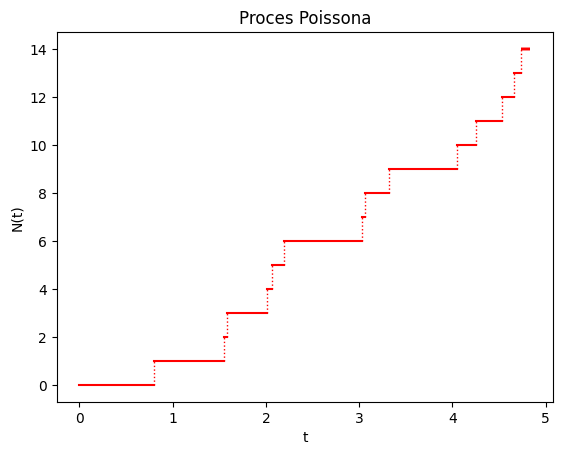

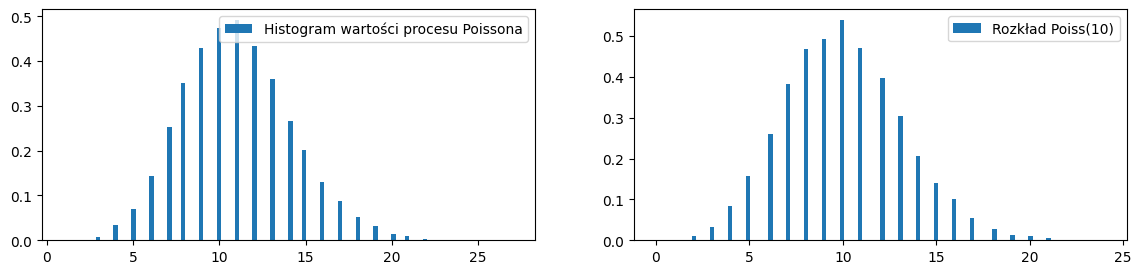

In [4]:
def m_t(t, lam=2):
    return lam*t 

def nhpp_inv(T = 5, lam = 2):
    results = np.array([0])
    N = np.random.poisson(m_t(T))
    u = np.random.uniform(size=N)
    results = np.append(results, u*T)
    return sorted(results), len(results)

results, _ = nhpp_inv()
draw(results)
plt.title('Proces Poissona')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()
values = np.empty(10000)
for i in range(10000):
    results, ns = nhpp_inv()
    values[i] = ns
r = poisson.rvs(10, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(10)')
ax[1].legend()
plt.show()

### Zadanie 3

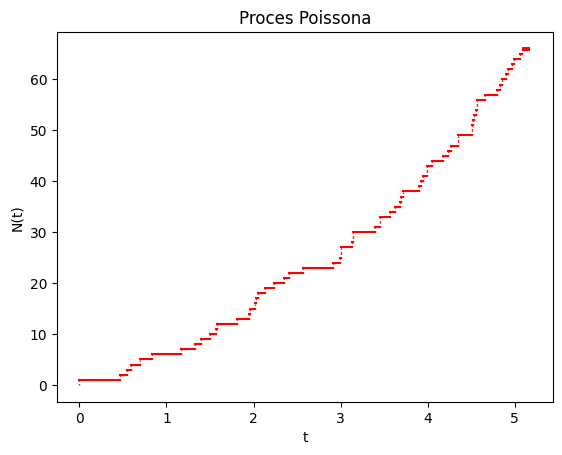

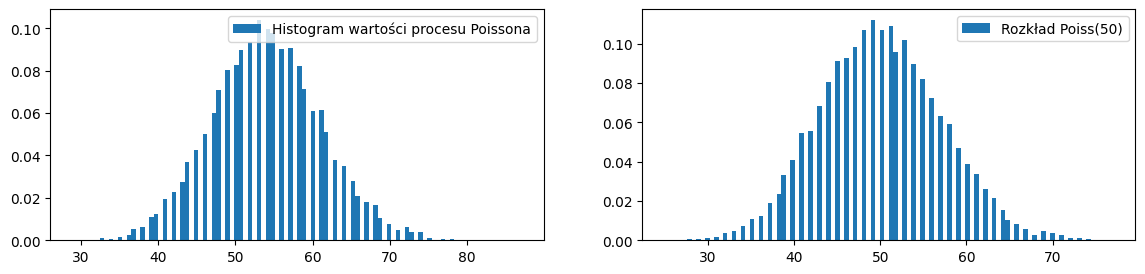

In [5]:
arr_1, _ = nhpp()
arr_2, _ = nhpp()
results = sorted(np.concatenate((arr_1, arr_2), axis = None))
draw(results)
plt.title('Proces Poissona')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()
values = np.empty(10000)
for i in range(10000):
    arr_1, n_1 = nhpp()
    arr_2, n_2 = nhpp()
    values[i] = n_1 + n_2
r = poisson.rvs(2*25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(50)')
ax[1].legend()
plt.show()

### Zadanie 4

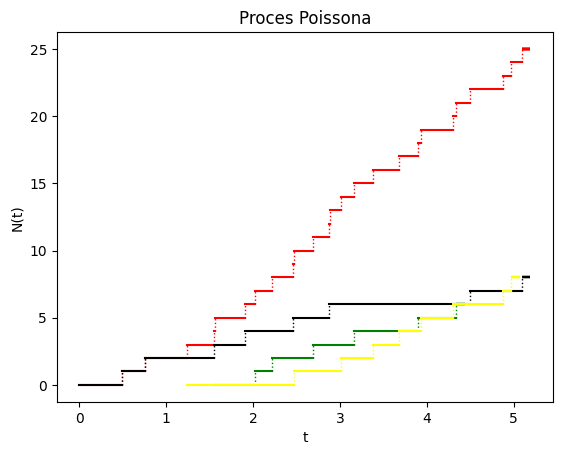

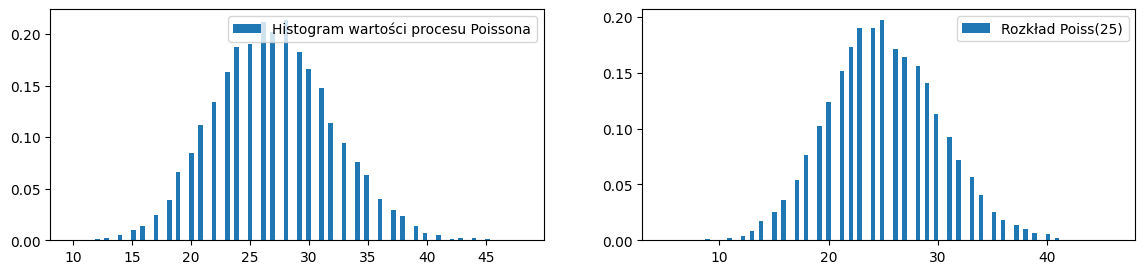

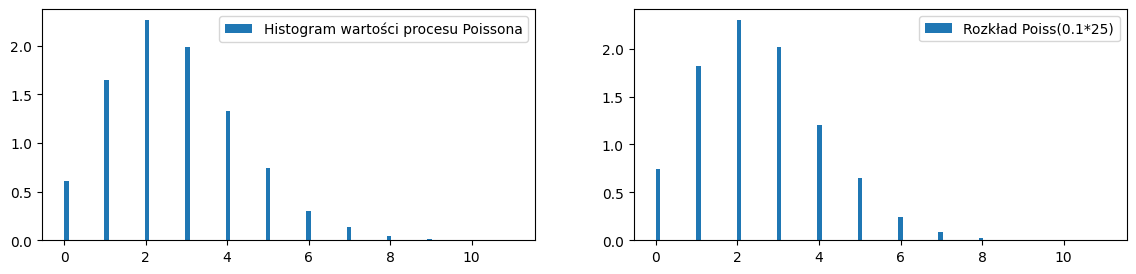

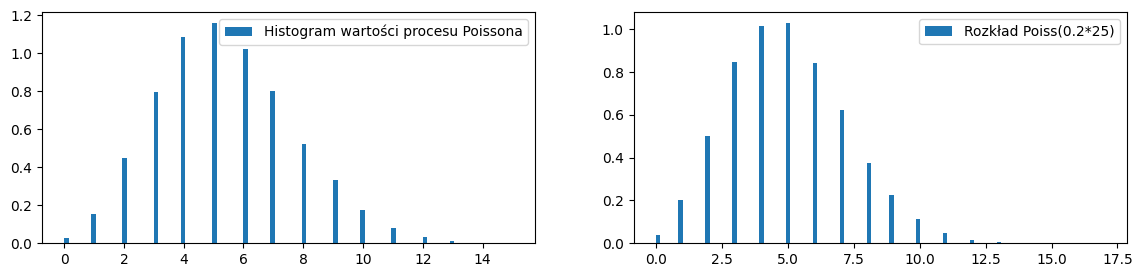

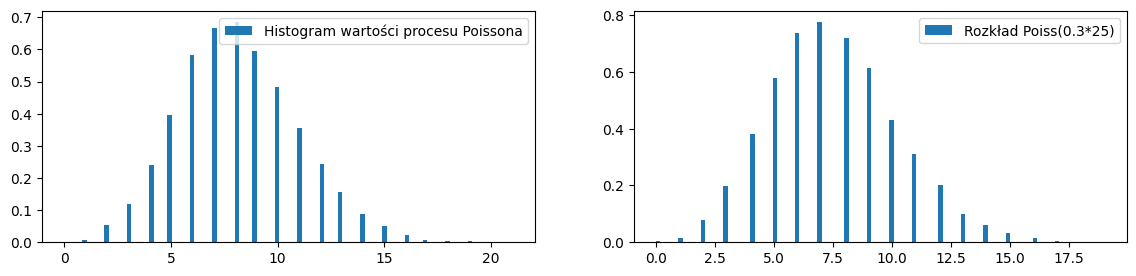

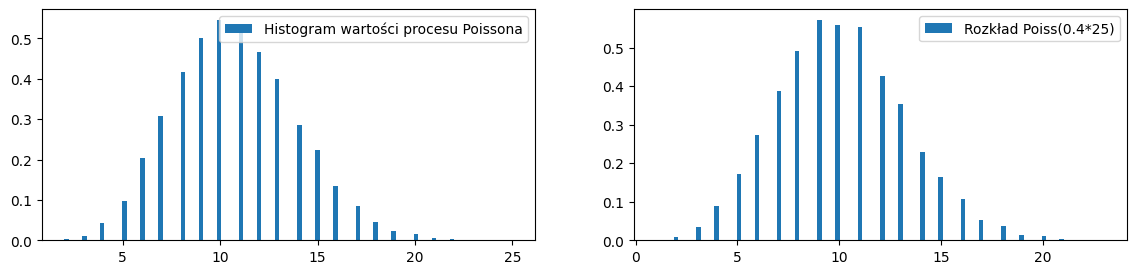

In [6]:
def marked(T = 5, lam = 2):
    times, _ = nhpp(T = 5, lam = 2)
    markers = np.random.choice([1,2,3,4], size = len(times), p=[0.1,0.2,0.3,0.4])
    t_1 = times[markers == 1]
    t_2 = times[markers == 2]
    t_3 = times[markers == 3]
    t_4 = times[markers == 4]
    return times, t_1, t_2, t_3, t_4


times, t_1, t_2, t_3, t_4 = marked()
draw(times)
draw(t_1, colors='blue')
draw(t_2, colors='black')
draw(t_3, colors='green')
draw(t_4, colors='yellow')
plt.title('Proces Poissona')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()
values = np.empty(10000)
for i in range(10000):
    ns = len(marked()[0])
    values[i] = ns
r = poisson.rvs(25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(25)')
ax[1].legend()
plt.show()
values = np.empty(10000)
for i in range(10000):
    ns = len(marked()[1])
    values[i] = ns
r = poisson.rvs(0.1*25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(0.1*25)')
ax[1].legend()
plt.show()
values = np.empty(10000)
for i in range(10000):
    ns = len(marked()[2])
    values[i] = ns
r = poisson.rvs(0.2*25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(0.2*25)')
ax[1].legend()
plt.show()
values = np.empty(10000)
for i in range(10000):
    ns = len(marked()[3])
    values[i] = ns
r = poisson.rvs(0.3*25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(0.3*25)')
ax[1].legend()
plt.show()
values = np.empty(10000)
for i in range(10000):
    ns = len(marked()[4])
    values[i] = ns
r = poisson.rvs(0.4*25, size=10000)
fig, ax = plt.subplots(1, 2, figsize= (14, 3))
ax[0].hist(values, bins='sqrt', density=True, label= 'Histogram wartości procesu Poissona')
ax[0].legend()
ax[1].hist(r, bins='sqrt', density = True, label='Rozkład Poiss(0.4*25)')
ax[1].legend()
plt.show()
